In [4]:
# Step 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Load Dataset
from google.colab import files
uploaded = files.upload()
df = pd.read_csv('AB_NYC_2019.csv.zip')
df.head()

# Display first few rows
print("Shape of dataset:", df.shape)
df.head()

Saving AB_NYC_2019.csv.zip to AB_NYC_2019.csv (1).zip
Shape of dataset: (48895, 16)


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [5]:
# General info
df.info()

# Check for NaN values
print("\nMissing values:\n", df.isnull().sum())

# Check duplicate rows
print("\nDuplicate rows:", df.duplicated().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [6]:
# Example: Fill missing values
# If 'reviews_per_month' has NaN, replace with 0
df['reviews_per_month'] = df['reviews_per_month'].fillna(0)

# For categorical columns (like 'name' or 'host_name'), drop or fill with 'Unknown'
df['name'] = df['name'].fillna("Unknown")
df['host_name'] = df['host_name'].fillna("Unknown")

# Drop rows if critical fields (like price, latitude, longitude) are missing
df = df.dropna(subset=['price', 'latitude', 'longitude'])


In [7]:
# Remove duplicate rows if any
df = df.drop_duplicates()
print("New dataset shape after removing duplicates:", df.shape)


New dataset shape after removing duplicates: (48895, 16)


In [8]:
# Ensure consistent formats
df['neighbourhood_group'] = df['neighbourhood_group'].str.title()  # e.g., "brooklyn" → "Brooklyn"
df['neighbourhood'] = df['neighbourhood'].str.title()

# Standardize price column (remove negatives if any)
df = df[df['price'] >= 0]


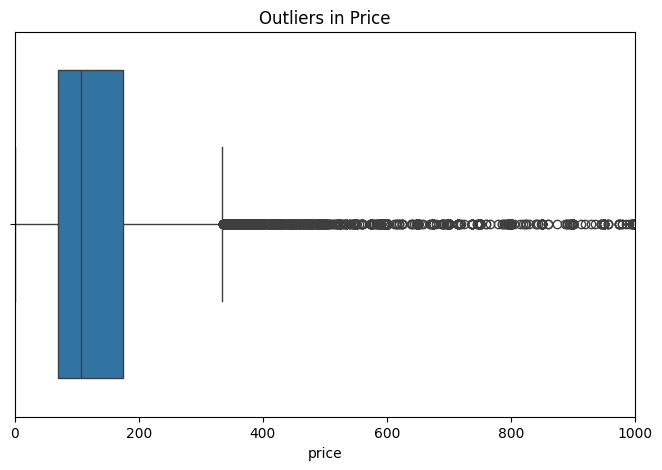

Shape after outlier removal: (48656, 16)


In [9]:
# Boxplot to visualize outliers in price
plt.figure(figsize=(8,5))
sns.boxplot(x=df['price'])
plt.xlim(0, 1000)  # zoom in (remove extreme values for visualization)
plt.title("Outliers in Price")
plt.show()

# Example: Remove listings with unrealistic prices (> $1000)
df = df[df['price'] <= 1000]

print("Shape after outlier removal:", df.shape)


| Step                      | Action Taken                                                                | Before                                                | After                                  |
| ------------------------- | --------------------------------------------------------------------------- | ----------------------------------------------------- | -------------------------------------- |
| **Data Integrity**        | Checked for missing values & duplicates                                     | Some columns had NaN values, dataset had duplicates   | Dataset integrity ensured              |
| **Missing Data Handling** | Filled missing values (`reviews_per_month=0`, `name`/`host_name="Unknown"`) | NaNs in multiple columns                              | No missing values in key columns       |
| **Duplicate Removal**     | Dropped duplicate rows                                                      | `X` duplicate rows found                              | All duplicates removed                 |
| **Standardization**       | Fixed text case (`Brooklyn`, `Manhattan`), removed negative prices          | Inconsistent capitalization, possible negative values | Consistent formatting & valid prices   |
| **Outlier Detection**     | Removed listings with extreme prices (> \$1000)                             | Price range extremely wide (up to \$10,000+)          | Price range capped at realistic levels |
